In [68]:
from transformers import AutoTokenizer, AutoModel, utils
from bertviz import model_view
import torch
import requests
import bs4
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# URL
URL = "https://en.wikipedia.org/wiki/Nigeria"

# sending the request
response = requests.get(URL)

# parsing the response
soup = bs4.BeautifulSoup(response.text, 'html')

In [15]:
paragraphs = soup.find_all('p')
content = [paragraph.text for paragraph in paragraphs]
content = content[1:]
content

['Nigeria (/naɪˈdʒɪəriə/ ), officially the Federal Republic of Nigeria, is a country in West Africa. It is the most populous country in Africa. It is geographically situated between the Sahel to the north and the Gulf of Guinea to the south in the Atlantic Ocean. It covers an area of 923,769 square kilometres (356,669\xa0sq\xa0mi), with a population of over 211 million. Nigeria borders Niger in the north, Chad in the northeast, Cameroon in the east, and Benin in the west. Nigeria is a federal republic comprising 36 states and the Federal Capital Territory, where the capital, Abuja, is located. The largest city in Nigeria is Lagos, one of the largest metropolitan areas in the world and the second-largest in Africa.\n',
 'Nigeria has been home to several indigenous pre-colonial states and kingdoms since the second millennium BC, with the Nok civilization in the 15th century BC marking the first internal unification in the country. The modern state originated with British colonialization 

In [58]:
print(len(content))

143


In [51]:
encoder_input_ids = tokenizer("Some text to intialize the dict", return_tensors="pt", add_special_tokens=True).input_ids
outputs = model(input_ids = encoder_input_ids)
w = outputs.encoder_attentions

In [54]:
model_name = "facebook/bart-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name, output_attentions=True)

encoder_input_ids = tokenizer("Some text to intialize the dict", return_tensors="pt", add_special_tokens=True).input_ids
outputs = model(input_ids = encoder_input_ids)
w = outputs.encoder_attentions
dict_acc = {}
for layer in range(len(w)):
    dict_acc[layer] = {}
    
nb_sentence = 0
for text in content:
    
    nb_sentence += 1
    
    # get encoded input vectors
    encoder_input_ids = tokenizer(text, return_tensors="pt", add_special_tokens=True).input_ids

    outputs = model(input_ids = encoder_input_ids)

    encoder_text = tokenizer.convert_ids_to_tokens(encoder_input_ids[0])
    att_map = outputs.encoder_attentions
    for layer in range(len(att_map)):
        dict_acc[layer] = {}
        for head in range(att_map[layer][0].shape[0]):
            # print(head)
            att_head_layer = att_map[layer][0][head]
            # print(att_head_layer.shape)
            dict_acc[layer][head] = 0
            max_att = torch.argmax(att_head_layer, axis = 1)
            # print(max_att)
            for i, arg in enumerate(max_att):
                if i > 0 and i < (max_att.shape[0]-1):
                    if arg == i+1 or arg == i-1:
                        dict_acc[layer][head] +=1
                elif i == 0:
                    if i+1 == arg:
                        dict_acc[layer][head] +=1
                elif i == (max_att.shape[0]-1):
                    if i-1 == arg:
                        dict_acc[layer][head] += 1
            dict_acc[layer][head] = dict_acc[layer][head] 

In [56]:
for layer in dict_acc:
    for head in dict_acc[layer]:
        dict_acc[layer][head] = dict_acc[layer][head] / nb_sentence

In [57]:
dict_acc

{0: {0: 0.0,
  1: 0.0,
  2: 0.013986013986013986,
  3: 0.1258741258741259,
  4: 0.07692307692307693,
  5: 0.11888111888111888,
  6: 0.06993006993006994,
  7: 0.013986013986013986,
  8: 0.03496503496503497,
  9: 0.027972027972027972,
  10: 0.11888111888111888,
  11: 0.006993006993006993},
 1: {0: 0.006993006993006993,
  1: 0.006993006993006993,
  2: 0.006993006993006993,
  3: 0.03496503496503497,
  4: 0.06293706293706294,
  5: 0.006993006993006993,
  6: 0.006993006993006993,
  7: 0.0,
  8: 0.006993006993006993,
  9: 0.027972027972027972,
  10: 0.03496503496503497,
  11: 0.04895104895104895},
 2: {0: 0.006993006993006993,
  1: 0.006993006993006993,
  2: 0.013986013986013986,
  3: 0.03496503496503497,
  4: 0.006993006993006993,
  5: 0.006993006993006993,
  6: 0.013986013986013986,
  7: 0.006993006993006993,
  8: 0.006993006993006993,
  9: 0.006993006993006993,
  10: 0.013986013986013986,
  11: 0.006993006993006993},
 3: {0: 0.006993006993006993,
  1: 0.006993006993006993,
  2: 0.006993006

In [65]:
int(len(dict_acc[0]))

12

In [66]:
heatmap = np.zeros((len(dict_acc), len(dict_acc[0])))
for layer in dict_acc:
    for head in dict_acc[layer]:
        heatmap[layer][head] = dict_acc[layer][head]

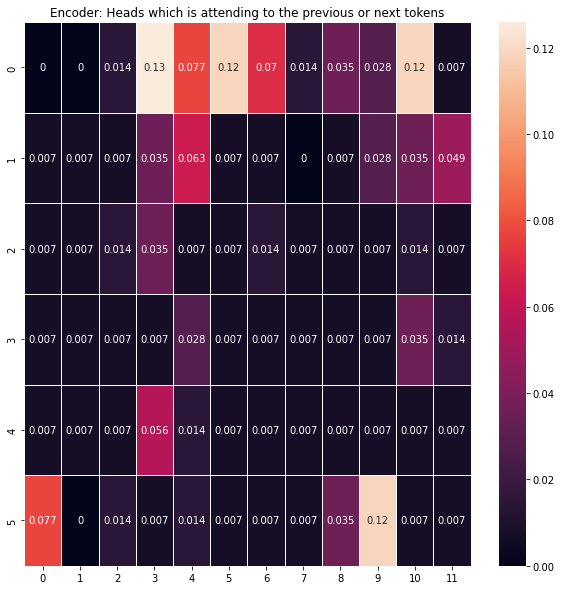

In [72]:
plt.figure(figsize=(10,10))
heat_map = sns.heatmap( heatmap, linewidth = 1 , annot = True)
plt.title( "Encoder: Heads which is attending to the previous or next tokens" )
plt.show()

Analysis only done with the encoder, I didn't have a NLP dataset with encoder, decoder values easy and fast to use

In [ ]:
model_name = "facebook/bart-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name, output_attentions=True)

encoder_input_ids = tokenizer("Some text to intialize the dict", return_tensors="pt", add_special_tokens=True).input_ids
outputs = model(input_ids = encoder_input_ids)
w = outputs.encoder_attentions
dict_acc = {}
for layer in range(len(w)):
    dict_acc[layer] = {}
    
nb_sentence = 0
for text in content:
    
    nb_sentence += 1
    
    # get encoded input vectors
    encoder_input_ids = tokenizer(text, return_tensors="pt", add_special_tokens=True).input_ids

    outputs = model(input_ids = encoder_input_ids)

    encoder_text = tokenizer.convert_ids_to_tokens(encoder_input_ids[0])
    att_map = outputs.encoder_attentions
    for layer in range(len(att_map)):
        dict_acc[layer] = {}
        for head in range(att_map[layer][0].shape[0]):
            # print(head)
            att_head_layer = att_map[layer][0][head]
            # print(att_head_layer.shape)
            dict_acc[layer][head] = 0
            max_att = torch.argmax(att_head_layer, axis = 1)
            # print(max_att)
            for i, arg in enumerate(max_att):
                if i > 0 and i < (max_att.shape[0]-1):
                    if arg == i+1 or arg == i-1:
                        dict_acc[layer][head] +=1
                elif i == 0:
                    if i+1 == arg:
                        dict_acc[layer][head] +=1
                elif i == (max_att.shape[0]-1):
                    if i-1 == arg:
                        dict_acc[layer][head] += 1
            dict_acc[layer][head] = dict_acc[layer][head] 